<a href="https://colab.research.google.com/github/raeshmakr/TitanicDataset/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Importing Libraries and Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = pd.read_csv("titanic-1.csv")

# Step 2: Data Exploration and Cleaning
# Check the first few rows of the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Step 2: Data Exploration and Cleaning
# Check the first few rows of the dataset
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Check for missing data
print(titanic_df.isnull().sum())

# Handle missing data
# For simplicity, we'll drop rows with missing values for this example
titanic_df = titanic_df.dropna()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
#Step 3: Data Analysis

# Survival Rate
survival_rate = titanic_df['Survived'].mean()
print("Overall Survival Rate:", survival_rate)


Overall Survival Rate: 0.6721311475409836


In [5]:
# Passenger Class Analysis
class_survival = titanic_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(class_survival)



Survival Rate by Passenger Class:
Pclass
1    0.670886
2    0.800000
3    0.500000
Name: Survived, dtype: float64


In [6]:
#Gender Analysis
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(gender_survival)



Survival Rate by Gender:
Sex
female    0.931818
male      0.431579
Name: Survived, dtype: float64


In [7]:
# Age Analysis
# Create age groups
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)
age_survival = titanic_df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(age_survival)



Survival Rate by Age Group:
AgeGroup
0-18     0.869565
19-30    0.717391
31-50    0.658537
51+      0.500000
Name: Survived, dtype: float64


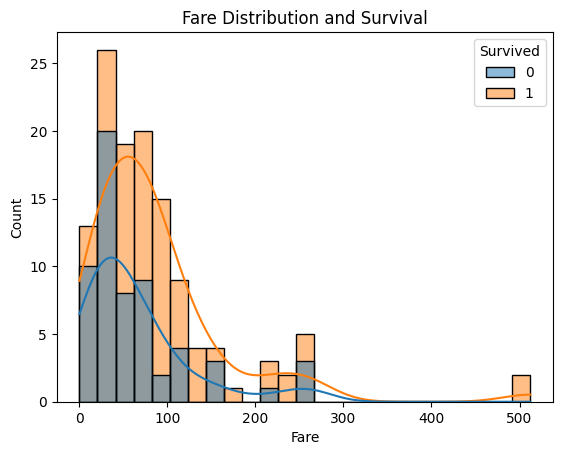

In [8]:

# Fare Analysis
fare_survival = sns.histplot(x='Fare', hue='Survived', data=titanic_df, kde=True)
fare_survival.set_title('Fare Distribution and Survival')
plt.show()

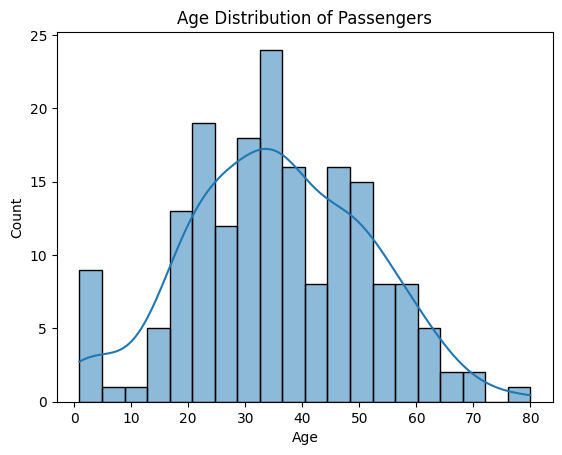

In [9]:
#Step 4: Data Visualization

# Age Distribution
age_distribution = sns.histplot(titanic_df['Age'], bins=20, kde=True)
age_distribution.set_title('Age Distribution of Passengers')
plt.show()


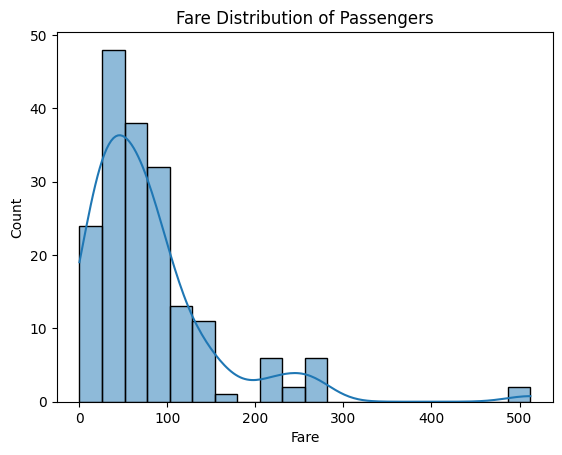

In [10]:
#Fare Distribution
fare_distribution = sns.histplot(titanic_df['Fare'], bins=20, kde=True)
fare_distribution.set_title('Fare Distribution of Passengers')
plt.show()


<ipython-input-11-274b2869dc06>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_df.corr()


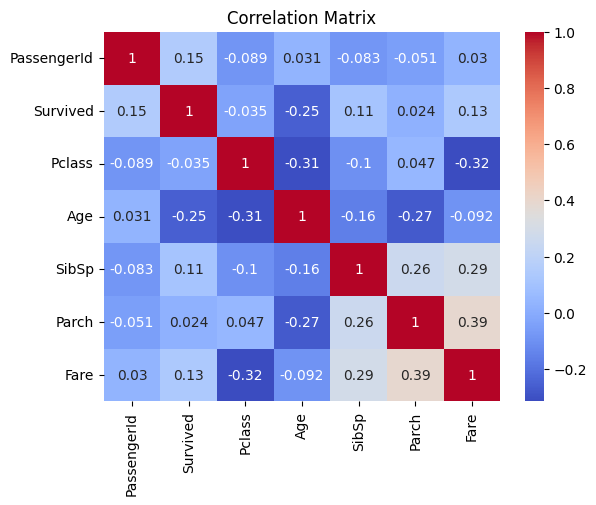

In [11]:
# Correlation Analysis
correlation_matrix = titanic_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
